In [1]:
import splat
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits, ascii
import numpy as np
import glob
%matplotlib inline

Adding 145 sources from /Users/caganze/research/splat//resources/Spectra/Public/LRIS-RED/ to spectral database
Adding 2404 sources from /Users/caganze/research/splat//resources/Spectra/Public/SPEX-PRISM/ to spectral database
Adding 89 sources from /Users/caganze/research/splat//resources/Spectra/Public/MAGE/ to spectral database


In [2]:
filepath=h='/Users/caganze/research/popsims/data/primeval_dwarfs/'

In [3]:
def read_fits(fl):
    try:
        spt=fl.split('_')[3]
        name=fl.split('_')[2]
        
        if fl.endswith('.fits'):
            hdu=fits.open(fl)[0]
            flux=hdu.data
            wave=(hdu.header['CRVAL1']+hdu.header['CDELT1']*np.arange(0, hdu.header['NAXIS1']))/1e4
            
        if fl.endswith('.txt'):
            hdu=ascii.read(fl).to_pandas()
            wave=hdu.col1
            flux=hdu.col2
            
        return pd.Series({'wave': wave,
                             'flux': flux, 
                             'name': name,
                             'spt': spt}) 
    except :
        print (fl)
        return pd.Series({})

In [4]:
fils=glob.glob(filepath+'/*')

In [5]:
all_sers=[]
for x in fils: all_sers.append(read_fits(x))

/Users/caganze/research/popsims/data/primeval_dwarfs/SDSS_J134749.74+333601.7_sdL0_SDSS_Primeval-I.txt
/Users/caganze/research/popsims/data/primeval_dwarfs/ULAS_J130710.22+151103.4_sdL8_Xshooter_NIR_Primeval-IV.fits
/Users/caganze/research/popsims/data/primeval_dwarfs/ULAS_J135058.85+081506.8_usdL3_Xshooter_NIR_Primeval-III.fits
/Users/caganze/research/popsims/data/primeval_dwarfs/README.txt
/Users/caganze/research/popsims/data/primeval_dwarfs/ULAS_J135058.85+081506.8_usdL3_Xshooter_VIS_Primeval-III.fits
/Users/caganze/research/popsims/data/primeval_dwarfs/ULAS_J020858.62+020657.0_esdL3_Xshooter_VIS_Primeval-III.fits


In [6]:
df=pd.DataFrame(all_sers)

[None]

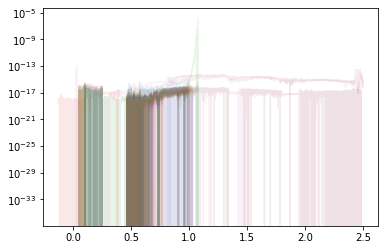

In [7]:
fig, ax=plt.subplots()
for _, row in df.iterrows():
    plt.plot(row.wave, row.flux, alpha=0.1)
ax.set(yscale='log')

In [9]:
df.to_pickle('/users/caganze/research/popsims/data/zhang_subdwarfs.pkl')